# DMA 22-23 marzo

### Laminato quasi simmetrico 11 strati + 1(rc 200)


| spessore | ply    | tipo           | oientamento |
|----------|--------|----------------|-------------|
| 0.26     | RC-200 | Tessuto (fine) | 0/90        |
| 0.49     | RC-400 | Tessuto        | 0/90        |
| 0.47     | XC-400 | c-ply          | -45/+45     |
| 0.33     | UC-300 | unidirezionale | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.49     | RC-400 | Tessuto        | 0/90        |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.47     | XC-400 | C-ply          | -45/45      |
| 0.49     | RC-400 | Tessuto        | 0/90        |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from Modulo_DMA import estrai,plottaggio
from Composito import get_laminate,Q_ply,get_engineering_constants,get_compliance,get_Bending_stiffness

f_min = 0
f_max = 100

# Variabili ausiliarie => nome file
name = []
name_2N = []
name_meta = []
name_2N_meta = []

for i in range(1,6):
    name.append(f"CFRP_f1_100_5_1N_{i}")
    name.append(f"CFRP_f1_100_5_1N_dietro_{i}")
    name_2N.append(f"CFRP_f1_100_5_2N_{i}")
    name_2N.append(f"CFRP_f1_100_5_2N_dietro_{i}")
    name_2N_meta.append(f"CFRP_f1_100_5_2N_{i}")
    name_meta.append(f"CFRP_f1_100_5_1N_{i}")
columns = ('Nome strato','caratteristiche')
widths = [1, 2, 2]
gs_kw = dict(width_ratios=widths)

rc_200 = {'s':0.26,'Ex':53522,'Ey':53522,'v':0.03,'G':2929,'fabric':True,'theta':0,'meta':['rc_200','tessuto (fine)']}
rc_400 = {'s':0.49,'Ex':53522,'Ey':53522,'v':0.03,'G':2929,'fabric':True,'theta':0,'meta':['rc_400','tessuto']}
xc_400 = {'s':0.47,'Ex':57770,'Ey':57770,'v':0.03,'G':3186,'fabric':True,'theta':45,'meta':['xc_400','c-ply (-45/+45)']}
uc_300 = {'s':0.33,'Ex':118454,'Ey':7104,'v':0.29,'G':3531,'fabric':False,'theta':0,'meta':['uc_300','unidirezionale']}
resina = {'s':0.2,'Ex':100,'Ey':100,'v':0.259,'G':3531,'fabric':False,'theta':0,'meta':['resina','resina epossirica']}

# Provino A

* nome : provino 1a s_reale : 0.95, s: 1.05
* D : 26486.774201987206, D con s teorico: 19616.972708285302
* nome : provino 3a s_reale : 2.25, s: 2.55
* D : 53561.326332117926, D con s teorico: 36794.112837553024
* nome : provino 12a s_reale : 0.69, s: 0.584
* D : 27402.46610567037, D con s teorico: 45195.831425685545


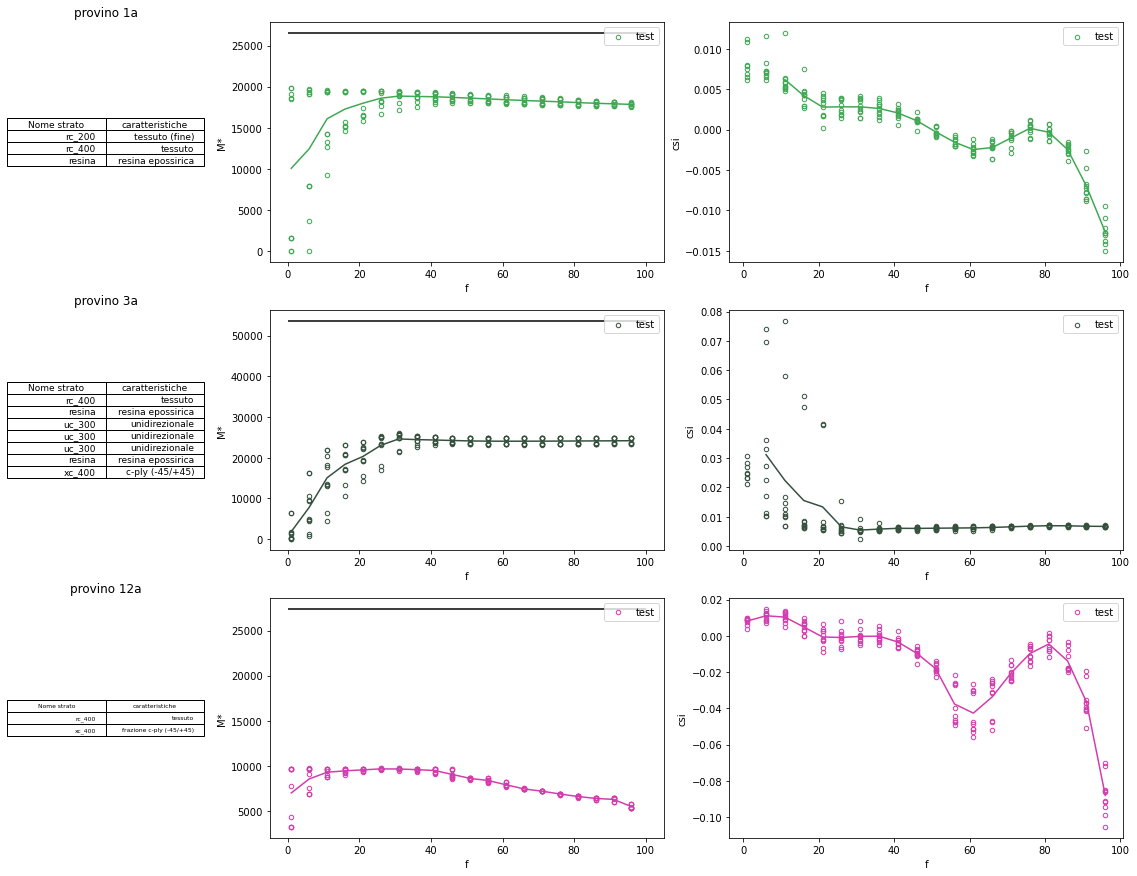

** Confonto prove provino 1A del 22/3 e quelle di febbraio


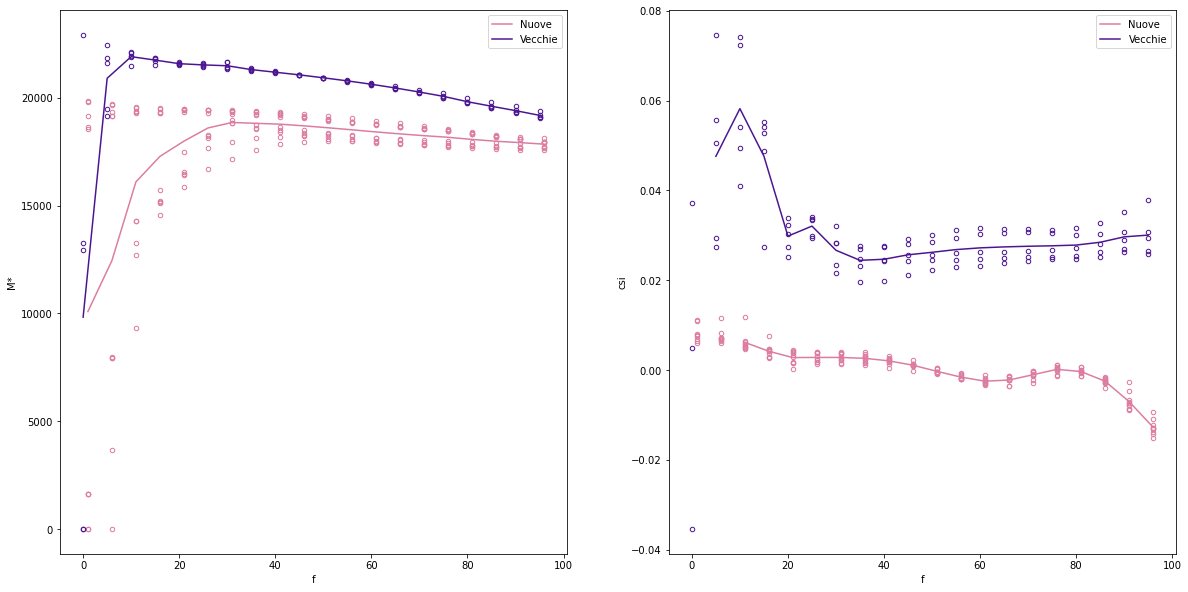

In [2]:
xc_400_meta = {'s':0.47*0.2,'Ex':57770,'Ey':57770,'v':0.03,'G':3186,'fabric':True,'theta':45,'meta':['xc_400','frazione c-ply (-45/+45)']}

path_base = r'dma/provino 1a/'
data_provino_1a = estrai(path_base,1,name=name)

resina['s'] = 0.95 - 0.85
laminato_provino_1a = {'name':'provino 1a','s':0.95,'struttura':[rc_200,rc_400,resina]}

resina['s'] = 2.25 - 1.95

path_base = r'dma/provino 3a/'
data_provino_3a = estrai(path_base,1,name=name)
laminato_provino_3a =  {'name':'provino 3a','s':2.25,'struttura':[rc_400,resina,uc_300,uc_300,uc_300,resina,xc_400]}

path_base = r'dma/provino 12a/'
data_provino_12a = estrai(path_base,1,name=name)
laminato_provino_12a = {'name':'provino 12a','s':0.69,'struttura':[rc_400,xc_400_meta]}
#

lista = [data_provino_1a,data_provino_3a,data_provino_12a]
lista_meta = [laminato_provino_1a,laminato_provino_3a,laminato_provino_12a]
def plot_combinato(lista,lista_meta,f_min = f_min,f_max = 100,y_lim = None):
    columns = ('Nome strato','caratteristiche')
    widths = [1, 2, 2]
    gs_kw = dict(width_ratios=widths)
    n = len(lista)
    if y_lim == None:
        y_lim = [None for i in range(n)]
    fig,ax = plt.subplots(n,3,figsize=(20,n*5),gridspec_kw=gs_kw)
    s = 0
    for i in range(n):
        ax[i][0].table(cellText=[ply['meta'] for ply in lista_meta[i]['struttura']],colLabels=columns,loc='center')
        ax[i][0].axis('off')
        ax[i][0].set_title(lista_meta[i]['name'])
        plottaggio(lista[i],ax[i][1],ax[i][2],f_min = f_min,flag_colore = 1)
        (A,B,D,s) = get_laminate(lista_meta[i]['struttura'])
        Bs = get_Bending_stiffness(A,B,D)
        ax[i][1].hlines(Bs[0,0]*(12/(lista_meta[i]['s']**3)),f_min,f_max)
        print( f"* nome : {lista_meta[i]['name']} s_reale : {lista_meta[i]['s']}, s: {s}")
        print( f"* D : { Bs[0,0]*(12/(lista_meta[i]['s']**3)) }, D con s teorico: { Bs[0,0]*(12/(s**3)) }")
        if y_lim[i] != None:
            ax[i][1].set_ylim([0,y_lim[i]])
    plt.show()


plot_combinato(lista,lista_meta,f_min = f_min,f_max = 100)
#
print('** Confonto prove provino 1A del 22/3 e quelle di febbraio')
path_base = r'dma/provino 1a vecchie/'
data_provino_1a_old = estrai(path_base,1,name=name_meta)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_1a,ax1,ax2,f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1a_old,ax1,ax2,f_min = f_min,flag_colore = 1)
ax1.legend(['Nuove','Vecchie'])
ax2.legend(['Nuove','Vecchie'])
plt.show()


## Provino B

C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


* nome : provino 1b s_reale : 2.42, s: 1.55
* D : 19417.997171108316, D con s teorico: 73901.8715428328
* nome : provino 1/2b s_reale : 1.19, s: 0.99
* D : 68550.46796960717, D con s teorico: 119054.47501563461
* nome : provino 3b s_reale : 0.66, s: 0.49
* D : 21921.981564302212, D con s teorico: 53570.21319187268
* nome : provino 4b s_reale : 2.3, s: 1.46
* D : 14045.4674319158, D con s teorico: 54911.22568040714
* nome : provino 5b s_reale : 0.68, s: 0.49
* D : 20044.02227448424, D con s teorico: 53570.21319187268


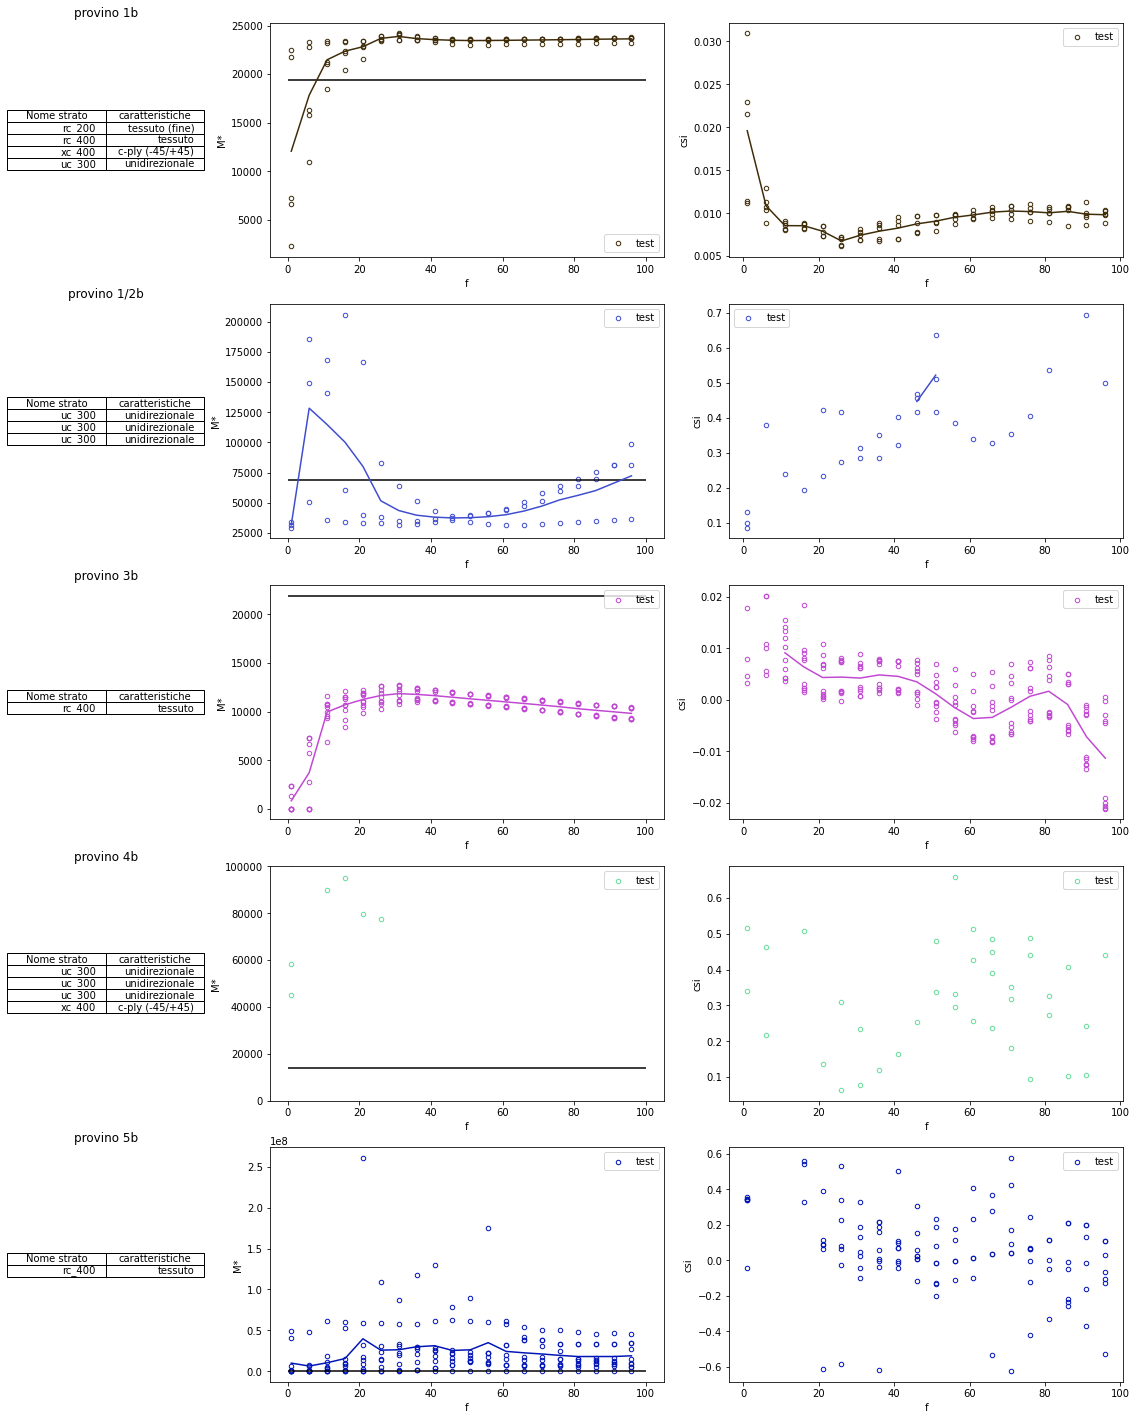

*Confronto 3b vecchio e nuovo


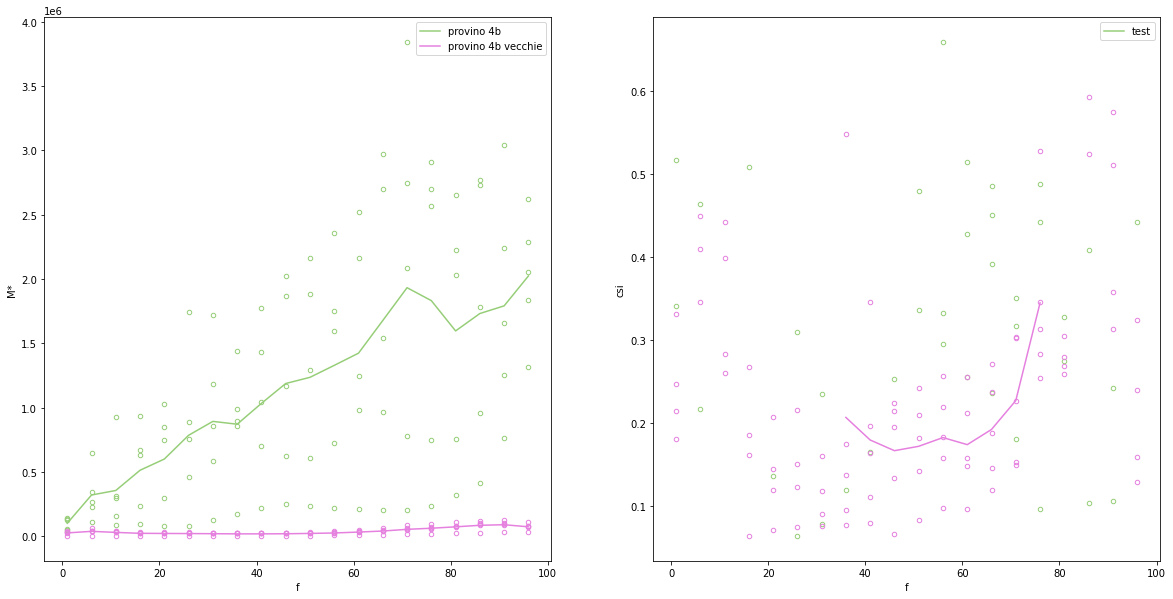

In [3]:

#
path_base = r'dma/provino 1b/'
data_provino_1b = estrai(path_base,1,name=name_meta)
data_provino_1b_2N = estrai(path_base,1,name=name_2N)

laminato_provino_1b = {'name':'provino 1b','s':2.42,'struttura':[rc_200,rc_400,xc_400,uc_300]}
path_base = r'dma/provino 1-2b/'
name_temp = []
name_temp = name_meta[:]
name_temp.remove('CFRP_f1_100_5_1N_1')
name_temp.remove('CFRP_f1_100_5_1N_5')
data_provino_1_2b = estrai(path_base,1,name=name_temp)
laminato_provino_1_2b = {'name':'provino 1/2b','s':1.19,'struttura':[uc_300,uc_300,uc_300]}
path_base = r'dma/provino 3b/'
data_provino_3b = estrai(path_base,1,name=name)
laminato_provino_3b = {'name':'provino 3b','s':0.66,'struttura':[rc_400]}
path_base = r'dma/provino 4b/'
data_provino_4b = estrai(path_base,1,name=name_meta)
laminato_provino_4b = {'name':'provino 4b','s':2.30,'struttura':[uc_300,uc_300,uc_300,xc_400]}
path_base = r'dma/provino 4b  vecchie/'
data_provino_4b_old = estrai(path_base,1,name=name_2N_meta)
path_base = r'dma/provino 5b/'
data_provino_5b = estrai(path_base,1,name=name)
laminato_provino_5b = {'name':'provino 5b','s':0.68,'struttura':[rc_400]}
## ---------------------------------------------------------------------
lista = [data_provino_1b,data_provino_1_2b,data_provino_3b,data_provino_4b,data_provino_5b]
lista_meta = [laminato_provino_1b,laminato_provino_1_2b,laminato_provino_3b,laminato_provino_4b,laminato_provino_5b]
y_lim = [None,None,None,0.1*10**6,None]#0.8*10**8]
plot_combinato(lista,lista_meta,f_min = f_min,f_max = 100,y_lim=y_lim)

  
print("*Confronto 3b vecchio e nuovo")
fig,ax = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_4b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_4b_old,ax[0],ax[1],f_min = f_min,flag_colore = 1)
ax[0].legend(['provino 4b','provino 4b vecchie'])

# Provino C

* nome : provino 2c s_reale : 1.53, s: 0.99
* D : 32253.512364300765, D con s teorico: 119054.47501563461
* nome : provino 3c s_reale : 1.78, s: 0.8580000000000001
* D : 13333.604866306438, D con s teorico: 119054.47501563458
* nome : provino 4c s_reale : 0.94, s: 0.584
* D : 10838.105162039801, D con s teorico: 45195.83142568554


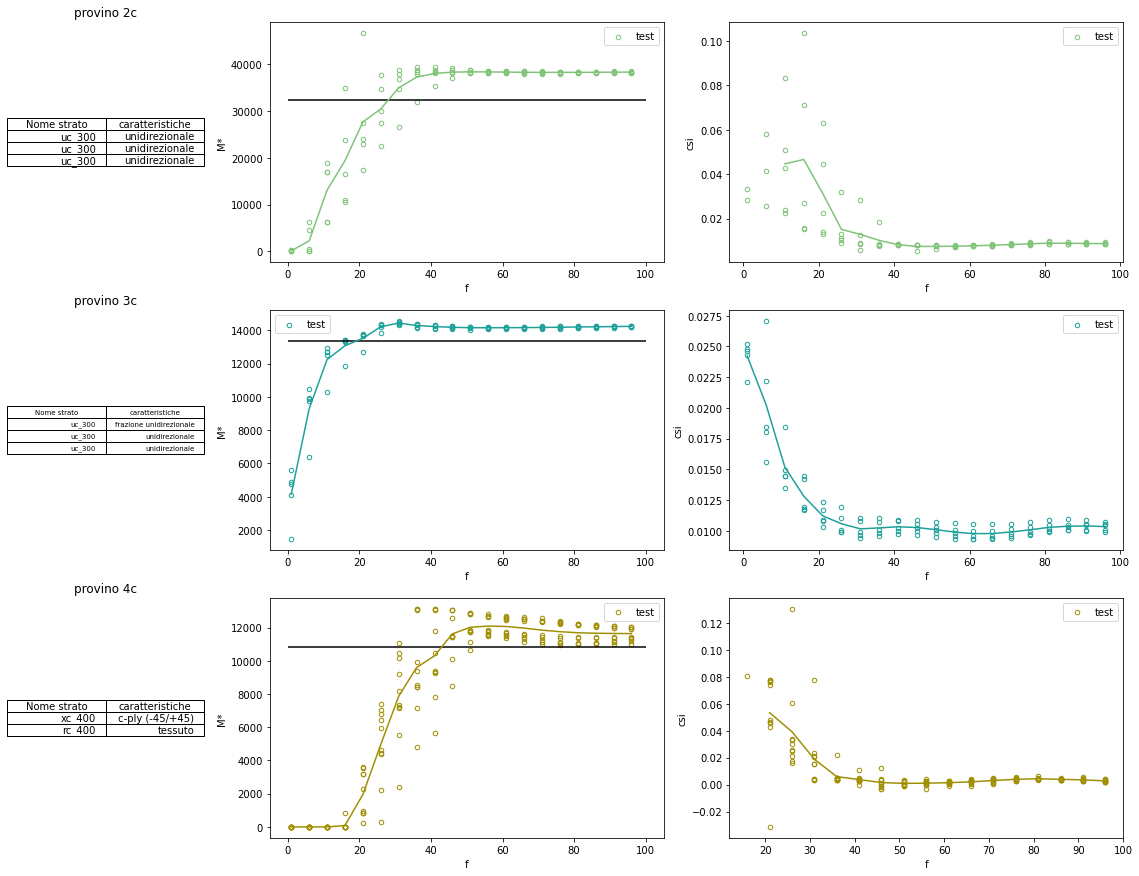

In [4]:
path_base = r'dma/provino 2c/'
data_provino_2c = estrai(path_base,1,name=name_meta)
laminato_provino_2c = {'name':'provino 2c','s':1.53,'struttura':[uc_300,uc_300,uc_300]}

path_base = r'dma/provino 3c/'
data_provino_3c = estrai(path_base,1,name=name_meta)

uc_300_meta = {'s':0.33*0.6,'Ex':118454,'Ey':7104,'v':0.29,'G':3531,'fabric':False,'theta':0,'meta':['uc_300','frazione unidirezionale']}

laminato_provino_3c = {'name':'provino 3c','s':1.78,'struttura':[uc_300_meta,uc_300,uc_300]}

path_base = r'dma/provino 4c/'
data_provino_4c = estrai(path_base,1,name=name)

xc_400_meta = {'s':0.47*0.2,'Ex':57770,'Ey':57770,'v':0.03,'G':3186,'fabric':True,'theta':45,'meta':['xc_400',' c-ply (-45/+45)']}

laminato_provino_4c = {'name':'provino 4c','s':0.94,'struttura':[xc_400_meta,rc_400]}
## ---------------------------------------------------------------------
lista = [data_provino_2c,data_provino_3c,data_provino_4c]
lista_meta = [laminato_provino_2c,laminato_provino_3c,laminato_provino_4c]
plot_combinato(lista,lista_meta,f_min = f_min,f_max = 100)

# Combinato

## Fibre (uc 300)

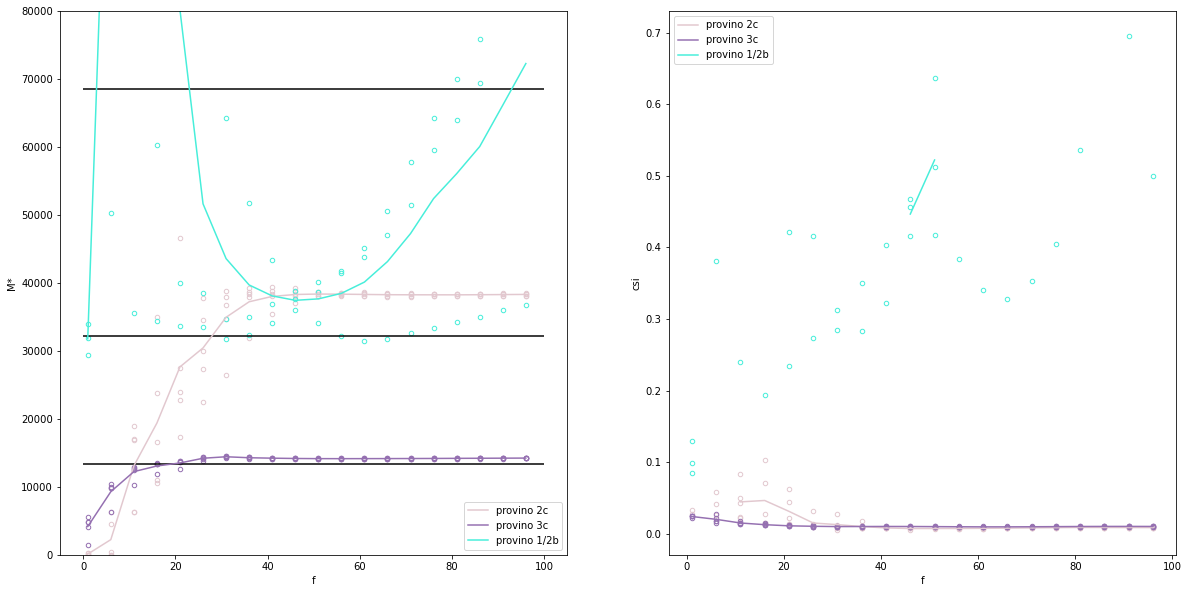

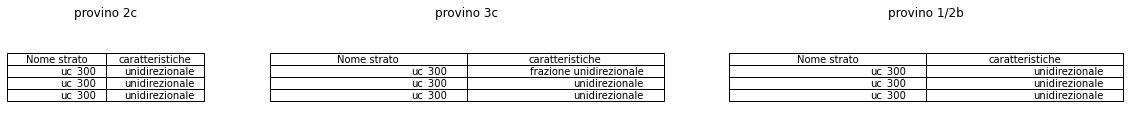

In [5]:
fig,ax = plt.subplots(1,2,figsize=(20,10))

plottaggio(data_provino_2c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1_2b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
lista_meta = [laminato_provino_2c,laminato_provino_3c,laminato_provino_1_2b]
for i in range(3):
    (A,B,D,_) = get_laminate(lista_meta[i]['struttura'])
    Bs = get_Bending_stiffness(A,B,D)
    ax[0].hlines(Bs[0,0]*(12/(lista_meta[i]['s']**3)),f_min,f_max)
ax[1].legend(['provino 2c','provino 3c','provino 1/2b'])
ax[0].legend(['provino 2c','provino 3c','provino 1/2b'])
ax[0].set_ylim([0,80000])
plt.show()

fig,ax = plt.subplots(1,3,figsize=(20,2),gridspec_kw=gs_kw)
columns = ('Nome strato','caratteristiche')
ax[0].table(cellText=[ply['meta'] for ply in laminato_provino_2c['struttura']],colLabels=columns,loc='center')
ax[0].axis('off')
ax[0].set_title('provino 2c')
ax[1].table(cellText=[ply['meta'] for ply in laminato_provino_3c['struttura']],colLabels=columns,loc='center')
ax[1].axis('off')
ax[1].set_title('provino 3c')
ax[2].table(cellText=[ply['meta'] for ply in laminato_provino_1_2b['struttura']],colLabels=columns,loc='center')
ax[2].axis('off')
ax[2].set_title('provino 1/2b')
plt.show()

## Tessuto RC 400

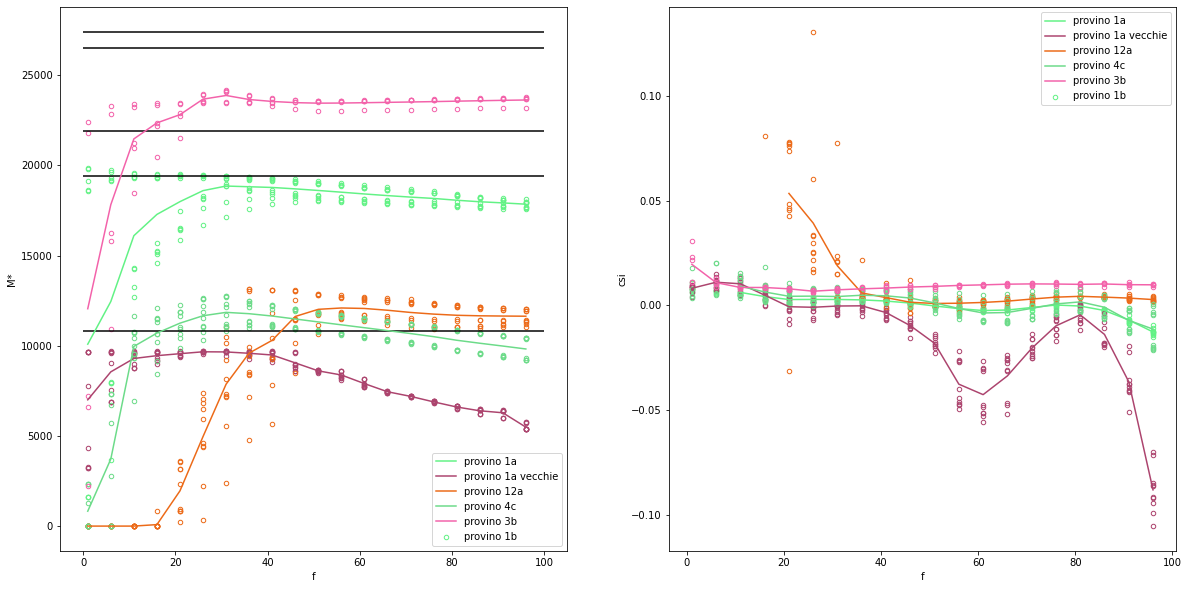

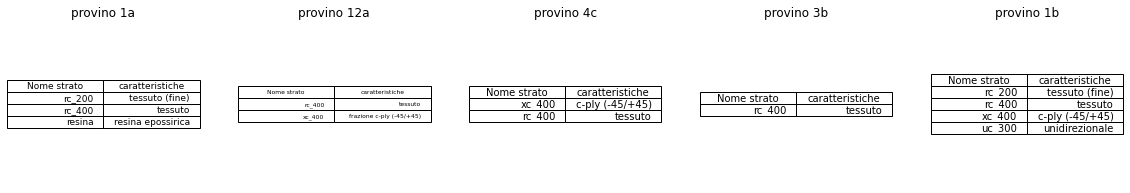

In [6]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_1a,ax[0],ax[1],f_min = f_min,flag_colore = 1)
#plottaggio(data_provino_1a_old,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_12a,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_4c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1b,ax[0],ax[1],f_min = f_min,flag_colore = 1)

lista_meta = [laminato_provino_1a,laminato_provino_12a,laminato_provino_4c,laminato_provino_3b,laminato_provino_1b]
for stima in lista_meta:
    (A,B,D,_) = get_laminate(stima['struttura'])
    Bs = get_Bending_stiffness(A,B,D)
    ax[0].hlines(Bs[0,0]*(12/(stima['s']**3)),f_min,f_max)

ax[1].legend(['provino 1a','provino 1a vecchie','provino 12a','provino 4c','provino 3b','provino 1b'])
ax[0].legend(['provino 1a','provino 1a vecchie','provino 12a','provino 4c','provino 3b','provino 1b'])
plt.show()

fig,ax = plt.subplots(1,5,figsize=(20,3))

ax[0].table(cellText=[ply['meta'] for ply in laminato_provino_1a['struttura']],colLabels=columns,loc='center')
ax[0].axis('off')
ax[0].set_title('provino 1a')
ax[1].table(cellText=[ply['meta'] for ply in laminato_provino_12a['struttura']],colLabels=columns,loc='center')
ax[1].axis('off')
ax[1].set_title('provino 12a')
ax[2].table(cellText=[ply['meta'] for ply in laminato_provino_4c['struttura']],colLabels=columns,loc='center')
ax[2].axis('off')
ax[2].set_title('provino 4c')
ax[3].table(cellText=[ply['meta'] for ply in laminato_provino_3b['struttura']],colLabels=columns,loc='center')
ax[3].axis('off')
ax[3].set_title('provino 3b')
ax[4].table(cellText=[ply['meta'] for ply in laminato_provino_1b['struttura']],colLabels=columns,loc='center')
ax[4].axis('off')
ax[4].set_title('provino 1b')
plt.show()

# Insieme

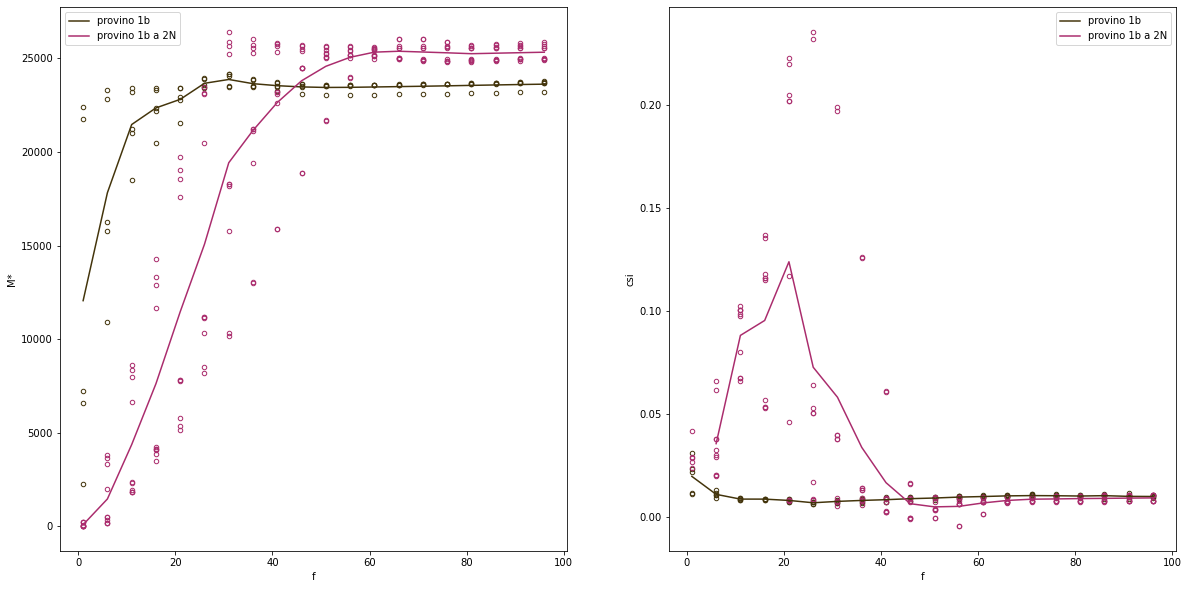

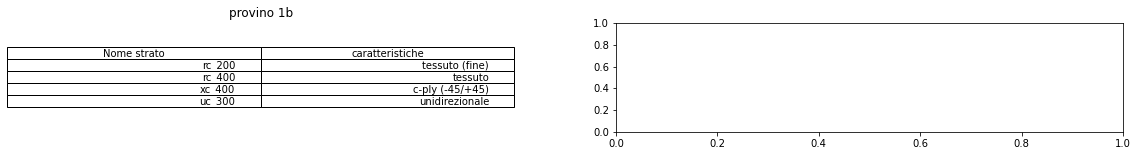

In [7]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_1b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1b_2N,ax[0],ax[1],f_min = f_min,flag_colore = 1)

ax[1].legend(['provino 1b','provino 1b a 2N'])
ax[0].legend(['provino 1b','provino 1b a 2N'])
plt.show()

fig,ax = plt.subplots(1,2,figsize=(20,2))

ax[0].table(cellText=[ply['meta'] for ply in laminato_provino_1b['struttura']],colLabels=columns,loc='center')
ax[0].axis('off')
ax[0].set_title('provino 1b')
plt.show()


* nome : provino 1b s_reale : 2.42, s: 1.55
* D : 19417.997171108316, D con s teorico: 73901.8715428328
* nome : provino 2c s_reale : 1.53, s: 0.99
* D : 32253.512364300765, D con s teorico: 119054.47501563461
* nome : provino 3b s_reale : 0.66, s: 0.49
* D : 21921.981564302212, D con s teorico: 53570.21319187268
* nome : provino 3a s_reale : 2.25, s: 2.55
* D : 53561.326332117926, D con s teorico: 36794.112837553024
* nome : provino 4c s_reale : 0.94, s: 0.584
* D : 10838.105162039801, D con s teorico: 45195.83142568554


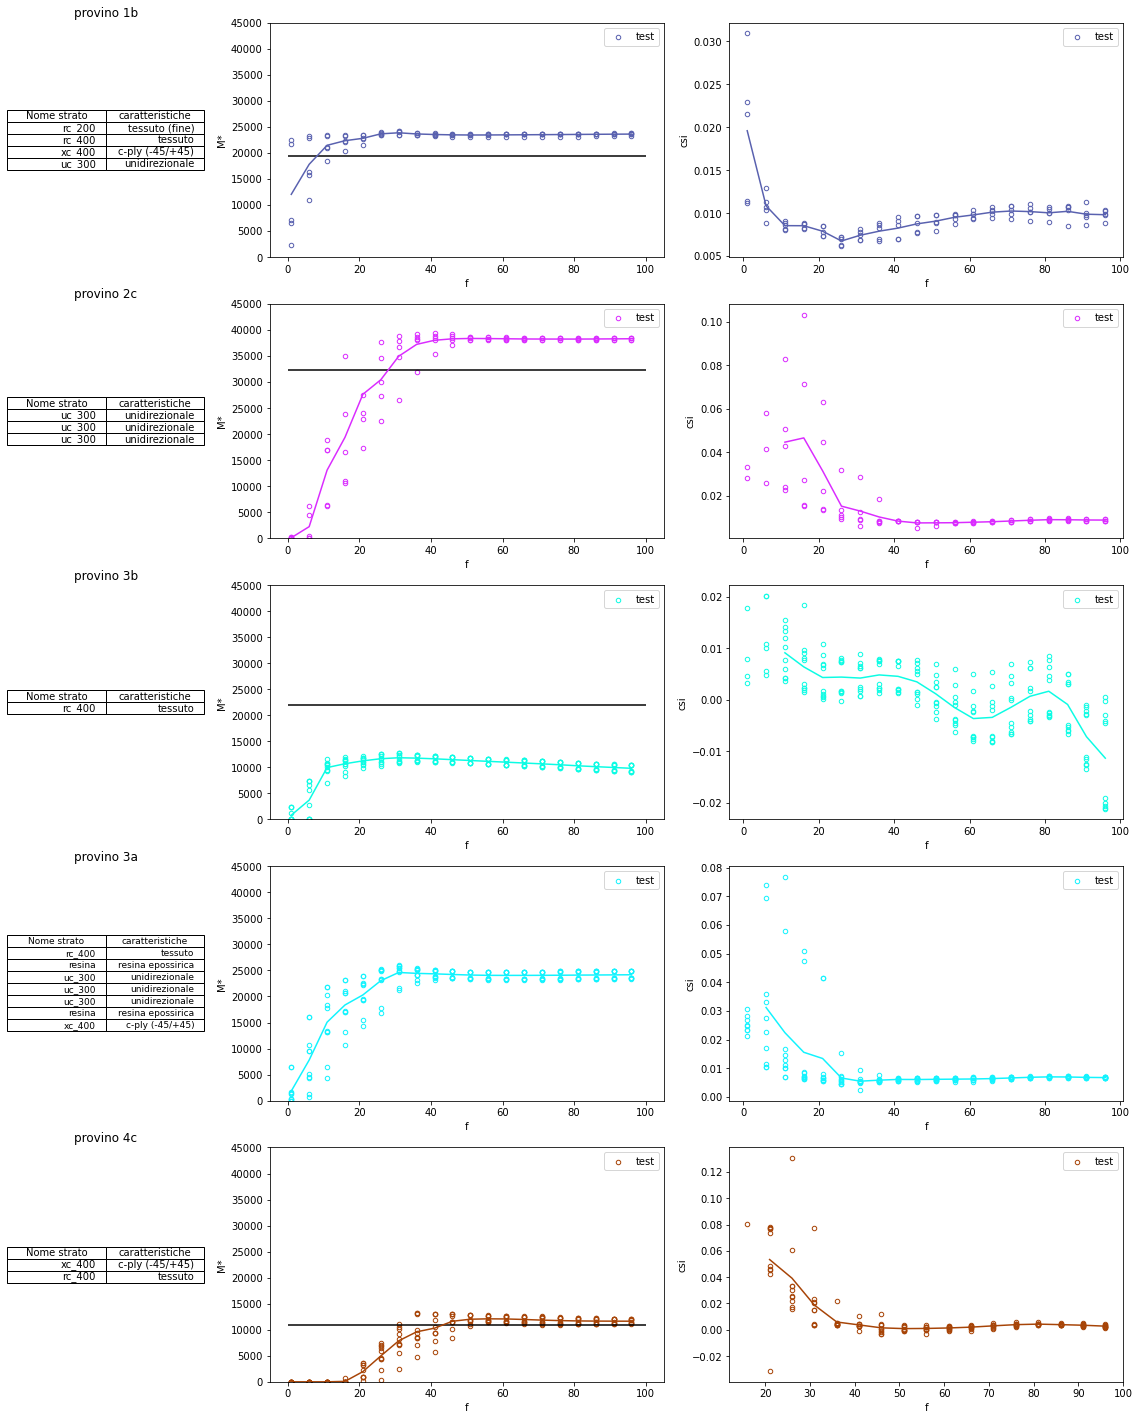

In [8]:
lista = [data_provino_1b,data_provino_2c,data_provino_3b,data_provino_3a,data_provino_4c]
lista_meta = [laminato_provino_1b,laminato_provino_2c,laminato_provino_3b,laminato_provino_3a,laminato_provino_4c]
y_lim = [45000,45000,45000,45000,45000]

plot_combinato(lista,lista_meta,f_min = f_min,f_max = 100,y_lim=y_lim)

  